# **Task 5. Applications of Feature Matching**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread("building.jpg")
image2 = cv2.imread("building1.jpg")

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k = 2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

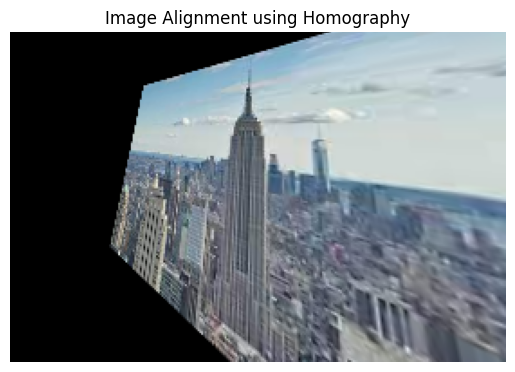

In [ ]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Image Alignment using Homography")
plt.axis("off")
plt.show()